# [**Statistics with Python**](#Statistics-with-Python)

Implement statistical methods with numpy.

***WIP*** Aug 2023

## [**Section 1 Standard Scores**](#Section-1-Standard-Scores)

1. [Standard Scores](#Standard-Scores)
2. [Characteristics of Standard Score](#Characteristics-of-Standard-Score)
3. [For Further Exploration](#For-Further-Exploration)

### [**Standard Scores**](#Section-1-Standard-Scores)

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", context="talk")


**What are standard scores?**


A standard score is also known as a *z-score*. It measures exactly how many standard deviations above or below the mean a data point is.

The formula for calculating a z-score:

```
standard score = ((each value) - (mean)) / standard deviation
```
​
The same formula written with symbols:

$$
\mu = \frac{1}{n}{\sum_{i=1}^{n}X_{i}}
$$

$$ 
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(X_{i}-\frac{\sum_{i=1}^{n}X_{i}}{n})^2}{n}}
$$

$$
z = Standard Score(X_{i}) =  \frac{ X_{i} - \mu}{\sigma}
$$

* z is the "z-score" (Standard Score).
* \${X_{i}}\$ is the value to be standardized.
* $\mu$ ('mu") is the mean.
* $\sigma$ ("sigma") is the standard deviation.

---

* A ***positive*** z-score indicates the data point is **above** average or mean.
* A ***negative*** z-score indicatess the data point is **below** average or mean.
* A ***0*** z-score indicates the data point is **on** the average or mean.

We usually meet numerical features with different scalers, units or both, when dealing with ML cases. In such scenarios, how to compare the importance of these values? *StandardScaler()*, from scikit-learn, could be a good choice. 

StandardScaler removes the mean and scales the data to unit variance. It means that, after transformation, the original dataset would be with $\mu=0\$ and \$sigma=1\$. 

Let's first implement our own method from scratch by numpy, then move to StandardScaler().

In [2]:
# %load code/utils.py
import numpy as np

class StandardScore:
    """Implement standardization with numpy.
    
    When instance of this class is created it will initialize an empty
    instance. The mu and sigms will be computed until fit() is called.

    transform() will output standardized results as a numpy array.

    fit_transform() will process fit() and transform() in one go.
    """
    
    def __init__(self):
        """Initialization."""
        pass
        
    def fit(self, arr):
        """Convert input as numpy array, then calculate the mu and sigma."""
        self.arr = np.array(arr)
        self.mu = self.arr.mean()
        self.sigma = self.arr.std()

    def transform(self):
        """Perform standardization ."""
        return np.array([(i - self.mu)/self.sigma for i in self.arr])

    def fit_transform(self, arr):
        """Fit to data, followed by standardization."""
        
        self.fit(arr)
        return self.transform()



In [3]:
df = pd.read_csv('data/Test_Scores_out_of_100.csv')
df

,Student,Native_Language,Foreign_Language,Geography,Biology
0,Alfred,90,71,73,59
1,Karl,81,90,61,73
2,A,73,79,14,47
3,B,97,70,41,38
4,C,85,67,49,63
5,D,60,66,87,56
6,E,74,60,69,15
7,F,64,83,65,53
8,G,72,57,36,80
9,H,67,85,7,50


Suppose Alfred and Karl are classmates. Alfred has a 90 score on 'Native Language', Karl has a 90 score on 'Foreign Language' Do they performance the same? Now please skip the idea to calculate the distance between the score and average/mean. z-score will answer our question far more better. 

In [4]:
# Native_Language
n_arr = df.iloc[:,1].values

#Foreign_Language 
f_arr = df.iloc[:,2].values

#Geography
g_arr = df.iloc[:,-2].values

#Biology
b_arr = df.iloc[:,-1].values

In [5]:
from python_scripts.utils import StandardScore

In [6]:
def get_zscore(arr):
    ss = StandardScore()
    return ss.fit_transform(arr)

In [7]:
get_zscore(n_arr)

array([ 0.77005354, -0.02961744, -0.7404361 ,  1.39201986,  0.32579188,
       -1.89551641, -0.65158377, -1.54010708, -0.82928843, -1.27355009,
        0.50349655, -0.29617444,  0.32579188,  1.30316753, -0.38502677,
        1.65857686,  0.9477582 ,  0.41464421])

In [8]:
get_zscore(f_arr)

array([-0.29617444,  1.39201986,  0.41464421, -0.38502677, -0.65158377,
       -0.7404361 , -1.27355009,  0.77005354, -1.54010708,  0.9477582 ,
        1.65857686,  1.30316753,  0.32579188, -0.02961744, -0.82928843,
        0.32579188, -1.89551641,  0.50349655])

In [9]:
pd.DataFrame({"Alfred Native_Language":[90, get_zscore(n_arr)[0]] , 
              "Karl Foreign_Language":[90, get_zscore(f_arr)[1]]}, 
             index=['score', 'z-score'])

,Alfred Native_Language,Karl Foreign_Language
score,90.000000,90.00000
z-score,0.770054,1.39202


In [10]:
# Plot z-score
def plot_zscores(alist, clist):
    """Accept 2 parameters.
    alist for data.
    clist for columns name.
    tle, the title name. optional.
    """
    res = []
    # Loop over input list
    for a in alist:
        res.append(list(get_zscore(a)))
    # Combine together
    df = pd.DataFrame(res, index=clist)

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(20, 2))
    sns.heatmap(df, annot=True,  linewidths=.5, ax=ax,)

    # ax.set_title("{}".format('TitleName'),fontsize=20)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)
    ax.set_xlabel("Students")
    ax.set_ylabel("z-score")

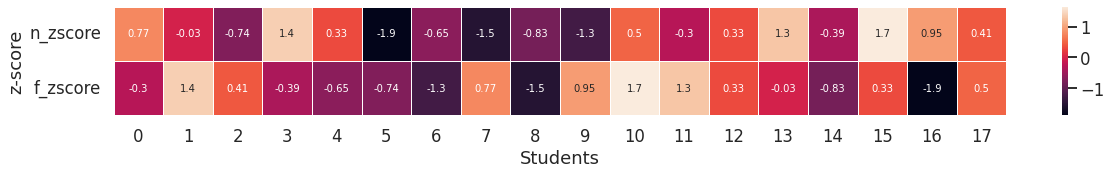

In [11]:
alist = [n_arr, f_arr]
clist = ['n_zscore', 'f_zscore']
plot_zscores(alist, clist)

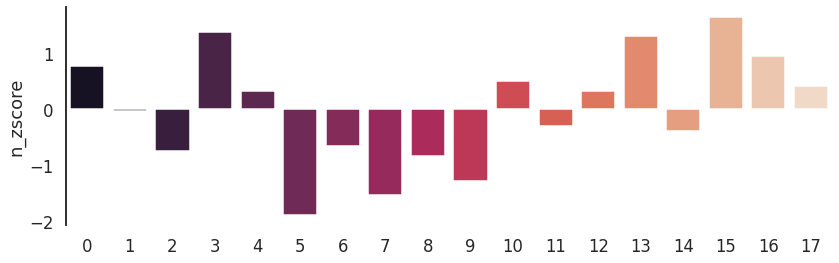

In [12]:
# Alternative plot
sns.set_theme(style="white", context="talk")

res = pd.DataFrame(get_zscore(n_arr), columns=['n_zscore'])
f, ax1 = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
sns.barplot(data=res, x=res.index, y='n_zscore', palette="rocket",)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

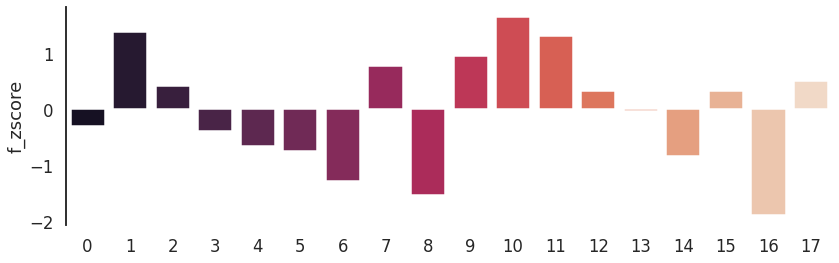

In [13]:
# Alternative plot
sns.set_theme(style="white", context="talk")

res = pd.DataFrame(get_zscore(f_arr), columns=['f_zscore'])
f, ax1 = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
sns.barplot(data=res, x=res.index, y='f_zscore', palette="rocket",)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

Karl's z -score is higher. Although they both have 90, but the average/mean of "Native Language" and "Foreign Language" are different. 

In [14]:
print('Mean of Native Language: {:.2f}\nMean of Foreign Language: {:.2f}'.format( n_arr.mean(), f_arr.mean() ))

Mean of Native Language: 81.33
Mean of Foreign Language: 74.33


"Geography" and "Biology" have the same average/mean of the class. Alfred has a 73 of "Geography". Karl has a 73 of "Biology". Who does perform better? Calculate z-score again.

In [15]:
print('Mean of Geography: {:.2f}\nMean of Biology: {:.2f}'.format( g_arr.mean(), b_arr.mean() ))

Mean of Geography: 53.00
Mean of Biology: 53.00


In [16]:
get_zscore(g_arr)

array([ 0.87941002,  0.35176401, -1.71484953, -0.52764601, -0.175882  ,
        1.49499703,  0.70352801,  0.52764601, -0.74749851, -2.02264304,
        0.        ,  2.06661354,  0.175882  , -0.35176401,  0.1319115 ,
       -0.83543952, -0.70352801,  0.74749851])

In [17]:
get_zscore(b_arr)

array([ 0.32819623,  1.09398744, -0.32819623, -0.82049058,  0.54699372,
        0.16409812, -2.07857613,  0.        ,  1.47688304, -0.16409812,
       -0.65639246,  0.49229435, -0.49229435, -1.47688304,  2.07857613,
       -0.98458869,  0.        ,  0.82049058])

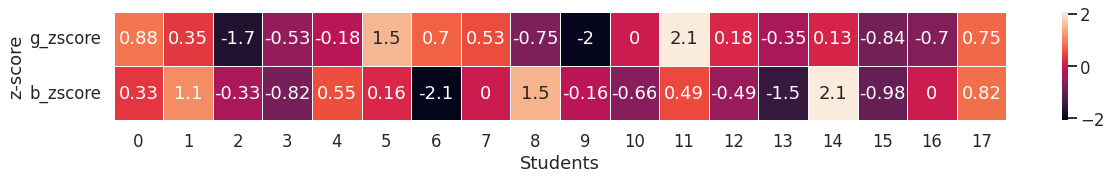

In [18]:
alist = [g_arr, b_arr]
clist = ['g_zscore', 'b_zscore']
plot_zscores(alist, clist)

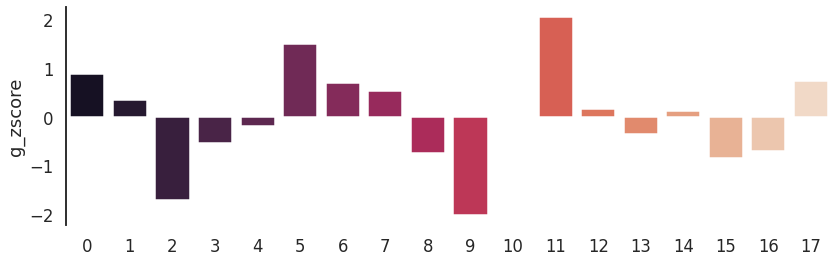

In [19]:
# Alternative plot
sns.set_theme(style="white", context="talk")
res = pd.DataFrame(get_zscore(g_arr), columns=['g_zscore'])

f, ax1 = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
sns.barplot(data=res, x=res.index, y='g_zscore', palette="rocket",)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

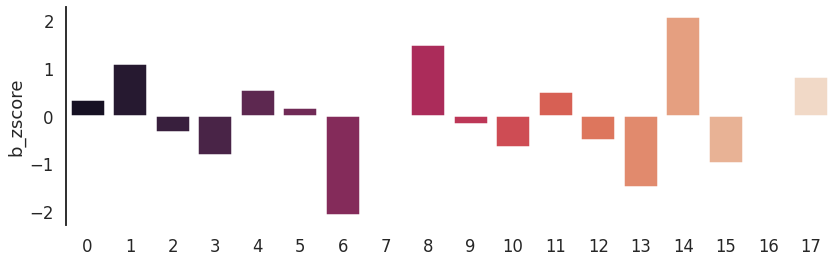

In [20]:
# Alternative plot
sns.set_theme(style="white", context="talk")
res = pd.DataFrame(get_zscore(b_arr), columns=['b_zscore'])

f, ax1 = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
sns.barplot(data=res, x=res.index, y='b_zscore', palette="rocket",)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [21]:
pd.DataFrame({"Alfred Geography":[90, get_zscore(g_arr)[0]] , 
              "Karl Biology":[90, get_zscore(b_arr)[1]]}, 
             index=['score', 'z-score'])

,Alfred Geography,Karl Biology
score,90.00000,90.000000
z-score,0.87941,1.093987


This time, their score have the same distance to average/mean. But the "standard deviation" or std are quite different.

In [22]:
pd.DataFrame({"Geography":[g_arr.std()], 
              "Biology":[b_arr.std()]}, 
             index=["Standard Deviation"]).T

,Standard Deviation
Geography,22.742520
Biology,18.281746


### [**Characteristics of Standard Score**](#Section-1-Standard-Score)

1. The arithmetic mean $\mu$ of the standard score is always **0**, and the standard deviation $\sigma$ is always **1**, no matter what scaler of our variable is. We could compare the scores of two test with totally different scaler. Such as ant is more powerful than a cat. Since ant could lift the weight many time ...

2. The arithmeticb mean $\mu$ of the standard score is always **0**, and the standard deviation $\sigma$ is always **1**, no matter what unit of our variable is measured.

distance or weathear

You can compare values with different units, such as batting average and number of home runs.


We could have a look at a scikit-learn's case to get better understanding.


### [**For Further Exploration**](#Section-1-Standard-Score)

WIP